Focus: 1) Writing a tutorial, 2) collecting results, 3) running statistical analysis, 4) reporting the results in paper form. Stop: 3:30pm 

The goal of this tutorial is to explain in detail what CSP is doing and it is a good choice for EEG. This tutorial will investigate from scratch how CSP works and how the hyper parameters can change its results. To begin this tutorial we must load all the needed libraries.

In [1]:
# Load the data and explain the current dataset
import mne
import numpy as np
from ulm_dataset import create_raw_data, create_event_array_for_movement_onset, filter_with_ica
from mne.time_frequency import tfr_morlet, psd_multitaper
from mne import Epochs, pick_types, concatenate_epochs, create_info
event_id = dict(flex = 5000, extend = 5001, sup = 5002, pro = 5003, close = 5004, hopen = 5005, rest = 1542)

We can then collect the data needed for one subject, specifically the first subject. The dataset used in this tutorial is one investigating user intent of upper extremity actions for motor execution. 

In [2]:
subjects = range(1, 2)
trials = range(1, 2) 
for subject in subjects:
    list_of_subject_raws = []
    for trial in trials:
        events, raw = create_event_array_for_movement_onset(subject, trial)
        current_raw = filter_with_ica(raw, event_id, 3.0)
        list_of_subject_raws.append(current_raw)
    concat_raw = mne.concatenate_raws(list_of_subject_raws)

Extracting EDF parameters from datasets/S01_ME/motorexecution_subject1_run1.gdf...
GDF file detected
Overlapping events detected. Use find_edf_events for the original events.
Setting channel info structure...
Interpolating stim channel. Events may jitter.
Creating raw.info structure...
3 channel names are too long, have been truncated to 15 characters:
['ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation']
Channel names are not unique, found duplicates for: {'eeg'}. Applying running numbers for duplicates.


C:\Users\mschr\AppData\Local\conda\conda\envs\mne\lib\site-packages\mne\io\edf\edf.py:1028: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
D:\Datasets\ulm_github\ulm_dataset.py:37: RuntimeWarning: Overlapping events detected. Use find_edf_events for the original events.
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ulm_github\ulm_dataset.py:37: RuntimeWarning: Interpolating stim channel. Events may jitter.
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ulm_github\ulm_dataset.py:37: RuntimeWarning: 3 channel names are too long, have been truncated to 15 characters:
['ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation']
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ulm_github\ulm_dataset.py:37: RuntimeWarning: Channel names are not unique, found duplicates for: {'eeg'}. Applying running numbers for duplicates.
  raw 

126 events found
Event IDs: [  1536   1537   1538   1539   1540   1541   1542   2339 101394 101395
 101396 101397 101398 101399 101400]
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data fo

Now we can concatenate all the events and pick events related to movement and to rest. 

In [147]:
concat_events = mne.find_events(concat_raw, stim_channel='STIM', shortest_event=1)
picks = mne.pick_types(concat_raw.info, eeg=True, eog=False, stim=False)
movement_id = dict(flex = 5000, extend = 5001, sup = 5002, pro = 5003, close = 5004, hopen = 5005)
rest_id = dict(rest = 3084)
movement_epochs = mne.Epochs(concat_raw, concat_events, movement_id, -1.0, -0.0, picks = picks, preload=True, baseline = (None, -1.0))
rest_epochs = mne.Epochs(concat_raw, concat_events, rest_id, 0.0, 1.0, picks = picks, preload=True, baseline = (None, 0.0))

1620 events found
Event IDs: [  3072   3074   3076   3078   3080   3082   3084   4678   5000   5001
   5002   5003   5004   5005 202788 202790 202792 202794 202796 202798
 202800]
360 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 360 events and 513 original time points ...
0 bad epochs dropped
60 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 60 events and 513 original time points ...
0 bad epochs dropped


We can see that for one subject there are 6 events *close*, *extend*, *flex*, *hopen*, *pro* and *sup* which include 60 epochs. Similarly, there are 60 epochs of a *rest* event.

In [137]:
movement_epochs

<Epochs  |   360 events (all good), -1.5 - -0.5 sec, baseline [None, -1.5], ~86.1 MB, data loaded,
 'close': 60
 'extend': 60
 'flex': 60
 'hopen': 60
 'pro': 60
 'sup': 60>

In [138]:
rest_epochs

<Epochs  |   60 events (all good), 0.5 - 1.5 sec, baseline [None, 0.5], ~14.5 MB, data loaded,
 'rest': 60>

We can show then shown the power of the Cz or the center midline electrode from 4-40Hz. This electode can be used to show motor activity. Unfortunately, the power of the two activities appear to be very similar and may not be useful in machine learning.

360 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 360 events and 513 original time points ...
0 bad epochs dropped
60 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 60 events and 513 original time points ...
0 bad epochs dropped
<Epochs  |   360 events (all good), -1.5 - -0.5 sec, baseline [None, -1.5], ~1.5 MB, data loaded,
 'close': 60
 'extend': 60
 'flex': 60
 'hopen': 60
 'pro': 60
 'sup': 60>
<Epochs  |   60 events (all good), 0.5 - 1.5 sec, baseline [None, 0.5], ~288 kB, data loaded,
 'rest': 60>
    using multitaper spectrum estimation with 7 DPSS windows
    using multitaper spectrum estimation with 7 DPSS windows


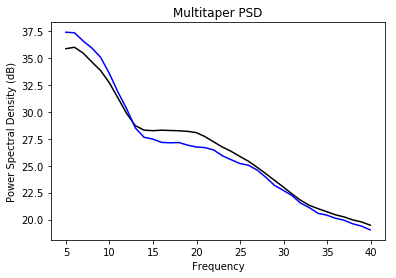

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
f, ax = plt.subplots()

pick_electrodes = mne.pick_types(concat_raw.info, eeg=False, eog=False, stim=False, include = ["Cz"])
movement_epochs = mne.Epochs(concat_raw, concat_events, movement_id, -1.5, -0.5, picks = pick_electrodes, preload=True, baseline = (None, -1.5))
rest_epochs = mne.Epochs(concat_raw, concat_events, rest_id, 0.5, 1.5, picks = pick_electrodes, preload=True, baseline = (None, 0.5))
print(movement_epochs)
print(rest_epochs)

psds_move, freqs = psd_multitaper(movement_epochs,fmin=4, fmax=40, n_jobs=1)
psds_rest, freqs = psd_multitaper(rest_epochs,fmin=4, fmax=40, n_jobs=1)

psds_movement = 10 * np.log10(psds_move)
psds_move_mean = psds_movement.mean(0)
psds_resting = 10 * np.log10(psds_rest)
psds_rest_mean = psds_resting.mean(0)


ax.plot(freqs, np.transpose(psds_move_mean), color='k')
ax.plot(freqs, np.transpose(psds_rest_mean), color='b')
ax.set(title='Multitaper PSD', xlabel='Frequency',
       ylabel='Power Spectral Density (dB)')
plt.show()

In [44]:
from mne.channels import read_layout
from mne.decoding import CSP

Common Spatial Patter of CSP can then be used to sort out the most relevant information needed to seperate two events. CSP is therefore a supervised machine learning technique which aims to find discriminating information from two events.

To investigate this, we will look at two events flexion and rest. The rest will take place right after the rest cue is presented and the flextion will look at (-1, 0). 

We can implement CSP from the python mne package. First we need to create the movement-only and rest epochs. We can then seperate training and testing sets. We will then let the components be 4 where two of the components correspond with one event and the other two correspond with the other event. Then, we can implement cross-validation and get results from the test set.

In [140]:
movement_epochs

<Epochs  |   360 events (all good), -1.5 - -0.5 sec, baseline [None, -1.5], ~1.5 MB, data loaded,
 'close': 60
 'extend': 60
 'flex': 60
 'hopen': 60
 'pro': 60
 'sup': 60>

In [148]:
# flex_labels = flex_epochs.events[:,2]
# rest_labels = rest_epochs.events[:,2]
# flex_labels = np.ones(len(flex_epochs.events[:,2]), dtype = np.uint8)
# rest_labels = np.zeros(len(rest_epochs.events[:,2]), dtype = np.uint8)
picks = mne.pick_types(concat_raw.info, eeg=True, eog=False, stim=False)
movement_epochs = mne.Epochs(concat_raw, concat_events, movement_id, -1.0, -0.0, picks = picks, preload=True, baseline = (None, -1.0))
rest_epochs = mne.Epochs(concat_raw, concat_events, rest_id, 0.0, 1.0, picks = picks, preload=True, baseline = (None, 0.0))
print(movement_epochs)
ev1_labels = np.ones(len(movement_epochs['flex'].events[:,2]), dtype = np.uint8)
ev2_labels = np.zeros(len(movement_epochs['extend'].events[:,2]), dtype = np.uint8)
rest_labels = np.zeros(len(rest_epochs.events[:,2]), dtype = np.uint8)

labels = np.concatenate((ev1_labels, rest_labels), axis = None)
data = np.concatenate((movement_epochs['extend'], rest_epochs), axis = 0)

360 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 360 events and 513 original time points ...
0 bad epochs dropped
60 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 60 events and 513 original time points ...
0 bad epochs dropped
<Epochs  |   360 events (all good), -1 - 0 sec, baseline [None, -1], ~86.1 MB, data loaded,
 'close': 60
 'extend': 60
 'flex': 60
 'hopen': 60
 'pro': 60
 'sup': 60>


In [125]:
# labels = np.concatenate((ev1_labels, ev2_labels,), axis = None)
# data = np.concatenate((movement_epochs['flex'], movement_epochs['extend']), axis = 0)

In [126]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [149]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from mne.decoding import Scaler, Vectorizer

cv = ShuffleSplit(10, test_size=0.2, random_state=42)
cv_split = cv.split(data)

In [152]:
# Assemble a classifier
lda = LinearDiscriminantAnalysis()
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)

# Use scikit-learn Pipeline with cross_val_score function
#clf = Pipeline([Scaler(movement_epochs.info), Vectorizer(), ('CSP', csp), ('LDA', lda)])

clf =  make_pipeline(Scaler(movement_epochs.info), csp, lda)
scores = cross_val_score(clf, data, labels, cv=cv, n_jobs=1)
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1. - class_balance)
print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores), class_balance))

Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Classification accuracy: 0.491667 / Chance level: 0.500000


In [85]:
# Printing the results
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1. - class_balance)
print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores), class_balance))
# plot CSP patterns estimated on full data for visualization
#csp.fit_transform(data, labels)

#layout = read_layout('EEG1005')
#csp.plot_patterns(movement_epochs.info, layout=layout, ch_type='eeg', units='Unknown', size=1.5)

Classification accuracy: 0.445833 / Chance level: 0.500000


In [261]:
csp_results = csp.fit_transform(data, labels)

Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


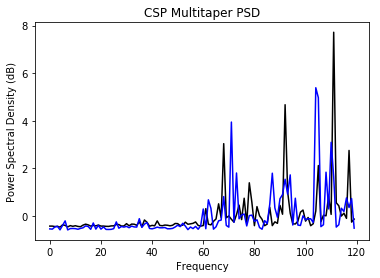

In [255]:
f, ax = plt.subplots()

#psds_move, freqs = psd_multitaper(csp_results[:,0],fmin=4, fmax=40, n_jobs=1)
#psds_rest, freqs = psd_multitaper(csp_results[:,3],fmin=4, fmax=40, n_jobs=1)
freqs = list(range(len(csp_results[:,0])))

csp1_power = csp_results[:,0]
csp2_power = csp_results[:,3]

# csp1_power = 10 * np.log10(pow(np.abs(csp_results[:,0]), 2)/len(csp_results[:,0]))
# csp2_power = 10 * np.log10(pow(np.abs(csp_results[:,3]), 2)/len(csp_results[:,3]))

# psds_movement = 10 * np.log10(psds_move)
# psds_move_mean = psds_movement.mean(0)
# psds_resting = 10 * np.log10(psds_rest)
# psds_rest_mean = psds_resting.mean(0)


ax.plot(freqs, csp1_power, color='k')
ax.plot(freqs, csp2_power, color='b')
ax.set(title='CSP Multitaper PSD', xlabel='Frequency',
       ylabel='Power Spectral Density (dB)')
plt.show()

In [264]:
scores

array([0.5       , 0.5       , 0.58333333, 0.625     , 0.45833333,
       0.58333333, 0.5       , 0.45833333, 0.375     , 0.375     ])

In [143]:
flex_epochs.info

<Info | 17 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | F3, F1, Fz, F2, F4, FFC5h, FFC3h, FFC1h, FFC2h, ...
    chs : list | 61 items (EEG: 61)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : list | 64 items
    events : list | 0 items
    highpass : float | 3.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 42.0 Hz
    nchan : int | 61
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 512.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_date : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType


In [ ]:
# Create a data frame testing all the permutations of events


## Create Filter Banks for Binary Classification

In [270]:
def create_epochs(raw, low_pass, high_pass, events, event_id, picks):
    new = raw.copy()
    new_data = new.filter(low_pass, high_pass, fir_design='firwin')
    epochs = Epochs(new_data, events, event_id, -1, 0, proj=True, picks=picks, baseline=None, preload=True)
    return epochs

In [275]:
num_trials = 10
subjects = range(1, 2)
trials = range(1, num_trials+1) 
tmin, tmax = -1., 0.
event_id = dict(flex = 5000, extend = 5001, sup = 5002, pro = 5003, close = 5004, hopen = 5005, rest = 1542)

# fb1, fb2, fb3, fb4, fb5, fb6, fb7, fb8, fb9 = [dict() for x in range(9)]
# filter_band_array = [fb1, fb2, fb3, fb4, fb5, fb6, fb7, fb8, fb9]

fb1, fb2, fb3, fb4, fb5, fb6, fb7, fb8, fb9 = [dict() for x in range(9)]
filter_band_array = [fb1, fb2, fb3, fb4, fb5, fb6, fb7, fb8, fb9]

for subject in subjects:
    list_of_subject_raws = []
    subject_name = 'S' + str(subject)
    subject_labels, subject_predictions = [], []
    
    for trial in trials:
        events, raw = create_event_array_for_movement_onset(subject, trial)
        current_raw = filter_with_ica(raw, event_id, 3.0)
        list_of_subject_raws.append(current_raw)
        
        if trial == num_trials:
            subject_raws = mne.concatenate_raws(list_of_subject_raws)
            events_raw = mne.find_events(subject_raws, stim_channel='STIM', shortest_event=1)
            picks = pick_types(subject_raws.info, eeg=True, stim=False, eog=False)
            
            raw = subject_raws
            for i, fb in enumerate(filter_band_array):
                fb[subject_name] = create_epochs(raw, i*4., (i*4.)+4., events, event_id, picks)

Extracting EDF parameters from D:/Datasets/ULM/S01_ME/motorexecution_subject1_run1.gdf...
GDF file detected
Overlapping events detected. Use find_edf_events for the original events.
Setting channel info structure...
Interpolating stim channel. Events may jitter.
Creating raw.info structure...
3 channel names are too long, have been truncated to 15 characters:
['ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation']
Channel names are not unique, found duplicates for: {'eeg'}. Applying running numbers for duplicates.


C:\Users\mschr\AppData\Local\conda\conda\envs\mne\lib\site-packages\mne\io\edf\edf.py:1028: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Overlapping events detected. Use find_edf_events for the original events.
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Interpolating stim channel. Events may jitter.
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: 3 channel names are too long, have been truncated to 15 characters:
['ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation']
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Channel names are not unique, found duplicates for: {'eeg'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_l

126 events found
Event IDs: [  1536   1537   1538   1539   1540   1541   1542   2339 101394 101395
 101396 101397 101398 101399 101400]
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data fo

C:\Users\mschr\AppData\Local\conda\conda\envs\mne\lib\site-packages\mne\io\edf\edf.py:1028: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Overlapping events detected. Use find_edf_events for the original events.
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Interpolating stim channel. Events may jitter.
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: 3 channel names are too long, have been truncated to 15 characters:
['ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation']
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Channel names are not unique, found duplicates for: {'eeg'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_l

126 events found
Event IDs: [  1536   1537   1538   1539   1540   1541   1542   2339 101394 101395
 101396 101397 101398 101399 101400]
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data fo

C:\Users\mschr\AppData\Local\conda\conda\envs\mne\lib\site-packages\mne\io\edf\edf.py:1028: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Overlapping events detected. Use find_edf_events for the original events.
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Interpolating stim channel. Events may jitter.
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: 3 channel names are too long, have been truncated to 15 characters:
['ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation']
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Channel names are not unique, found duplicates for: {'eeg'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_l

126 events found
Event IDs: [  1536   1537   1538   1539   1540   1541   1542   2339 101394 101395
 101396 101397 101398 101399 101400]
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data fo

C:\Users\mschr\AppData\Local\conda\conda\envs\mne\lib\site-packages\mne\io\edf\edf.py:1028: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Overlapping events detected. Use find_edf_events for the original events.
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Interpolating stim channel. Events may jitter.
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: 3 channel names are too long, have been truncated to 15 characters:
['ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation']
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Channel names are not unique, found duplicates for: {'eeg'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_l

126 events found
Event IDs: [  1536   1537   1538   1539   1540   1541   1542   2339 101394 101395
 101396 101397 101398 101399 101400]
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data fo

C:\Users\mschr\AppData\Local\conda\conda\envs\mne\lib\site-packages\mne\io\edf\edf.py:1028: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Overlapping events detected. Use find_edf_events for the original events.
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Interpolating stim channel. Events may jitter.
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: 3 channel names are too long, have been truncated to 15 characters:
['ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation']
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Channel names are not unique, found duplicates for: {'eeg'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_l

126 events found
Event IDs: [  1536   1537   1538   1539   1540   1541   1542   2339 101394 101395
 101396 101397 101398 101399 101400]
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data fo

C:\Users\mschr\AppData\Local\conda\conda\envs\mne\lib\site-packages\mne\io\edf\edf.py:1028: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Overlapping events detected. Use find_edf_events for the original events.
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Interpolating stim channel. Events may jitter.
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: 3 channel names are too long, have been truncated to 15 characters:
['ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation']
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Channel names are not unique, found duplicates for: {'eeg'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_l

126 events found
Event IDs: [  1536   1537   1538   1539   1540   1541   1542   2339 101394 101395
 101396 101397 101398 101399 101400]
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data fo

C:\Users\mschr\AppData\Local\conda\conda\envs\mne\lib\site-packages\mne\io\edf\edf.py:1028: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Overlapping events detected. Use find_edf_events for the original events.
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Interpolating stim channel. Events may jitter.
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: 3 channel names are too long, have been truncated to 15 characters:
['ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation']
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Channel names are not unique, found duplicates for: {'eeg'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_l

126 events found
Event IDs: [  1536   1537   1538   1539   1540   1541   1542   2339 101394 101395
 101396 101397 101398 101399 101400]
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data fo

C:\Users\mschr\AppData\Local\conda\conda\envs\mne\lib\site-packages\mne\io\edf\edf.py:1028: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Overlapping events detected. Use find_edf_events for the original events.
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Interpolating stim channel. Events may jitter.
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: 3 channel names are too long, have been truncated to 15 characters:
['ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation']
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Channel names are not unique, found duplicates for: {'eeg'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_l

126 events found
Event IDs: [  1536   1537   1538   1539   1540   1541   1542   2339 101394 101395
 101396 101397 101398 101399 101400]
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data fo

C:\Users\mschr\AppData\Local\conda\conda\envs\mne\lib\site-packages\mne\io\edf\edf.py:1028: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Overlapping events detected. Use find_edf_events for the original events.
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Interpolating stim channel. Events may jitter.
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: 3 channel names are too long, have been truncated to 15 characters:
['ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation']
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Channel names are not unique, found duplicates for: {'eeg'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_l

126 events found
Event IDs: [  1536   1537   1538   1539   1540   1541   1542   2339 101394 101395
 101396 101397 101398 101399 101400]
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data fo

C:\Users\mschr\AppData\Local\conda\conda\envs\mne\lib\site-packages\mne\io\edf\edf.py:1028: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  etmode = np.fromstring(etmode, np.uint8).tolist()[0]
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Overlapping events detected. Use find_edf_events for the original events.
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Interpolating stim channel. Events may jitter.
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: 3 channel names are too long, have been truncated to 15 characters:
['ShoulderAdductio', 'ShoulderFlexionE', 'ShoulderRotation']
  raw = mne.io.read_raw_edf(file_location)
D:\Datasets\ULM\ulm_dataset.py:37: RuntimeWarning: Channel names are not unique, found duplicates for: {'eeg'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_l

126 events found
Event IDs: [  1536   1537   1538   1539   1540   1541   1542   2339 101394 101395
 101396 101397 101398 101399 101400]
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 6 events and 1537 original time points ...
0 bad epochs dropped
6 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data fo

In [278]:
fb2['S1']

<Epochs  |   42 events (all good), -1 - 0 sec, baseline off, ~10.2 MB, data loaded,
 'close': 6
 'extend': 6
 'flex': 6
 'hopen': 6
 'pro': 6
 'rest': 6
 'sup': 6>

In [288]:
num_trials = 10
subjects = range(1, 2)
trials = range(1, num_trials+1) 
tmin, tmax = -1., 0.
event_id = dict(flex = 5000, extend = 5001, sup = 5002, pro = 5003, close = 5004, hopen = 5005, rest = 1542)

# fb1, fb2, fb3, fb4, fb5, fb6, fb7, fb8, fb9 = [dict() for x in range(9)]
# filter_band_array = [fb1, fb2, fb3, fb4, fb5, fb6, fb7, fb8, fb9]

fb1, fb2, fb3, fb4, fb5, fb6, fb7, fb8, fb9 = [dict() for x in range(9)]
filter_band_array = [fb1, fb2, fb3, fb4, fb5, fb6, fb7, fb8, fb9]

for subject in subjects:
    subject_name = 'S' + str(subject)
    subject_labels, subject_predictions = [], []
    
    concat_events = mne.find_events(concat_raw, stim_channel='STIM', shortest_event=1)
    picks = mne.pick_types(concat_raw.info, eeg=True, eog=False, stim=False)
    
    for i, fb in enumerate(filter_band_array):
        fb[subject_name] = create_epochs(concat_raw, i*4., (i*4.)+4., events, event_id, picks)

1620 events found
Event IDs: [  3072   3074   3076   3078   3080   3082   3084   4678   5000   5001
   5002   5003   5004   5005 202788 202790 202792 202794 202796 202798
 202800]
42 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 42 events and 513 original time points ...
0 bad epochs dropped
42 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 42 events and 513 original time points ...
0 bad epochs dropped
42 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 42 events and 513 original time points ...
0 bad epochs dropped
42 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 42 events and 513 original time points ...
0 bad epochs dropped
42 matching events found
No baseline correction applied
Not setting meta

In [290]:
fb2

{'S1': <Epochs  |   42 events (all good), -1 - 0 sec, baseline off, ~10.2 MB, data loaded,
  'close': 6
  'extend': 6
  'flex': 6
  'hopen': 6
  'pro': 6
  'rest': 6
  'sup': 6>}

## Test multiple bands

In [280]:
import itertools
filter_band_string = ['fb1', 'fb2', 'fb3', 'fb4', 'fb5', 'fb6', 'fb7', 'fb8', 'fb9']
#filter_band_string = ['fb4', 'fb5', 'fb7']
csp_list = ['csp_'+ x for x in filter_band_string]
lda_list = ['lda_'+ x for x in filter_band_string]

csp = dict()
lda = dict()
for csp_name, lda_name in zip(csp_list, lda_list):
    csp[csp_name] = CSP(n_components=4, reg='shrinkage', log=False, norm_trace=False)
    lda[lda_name] = LinearDiscriminantAnalysis(n_components=1, shrinkage='auto', solver='lsqr')
    
event_id = dict(flex = 5000,extend = 5001, sup = 5002, pro = 5003, close = 5004, hopen = 5005, rest = 1542)
combinations = list(itertools.combinations(event_id,2))

In [ ]:
# Define empty data
list_events =['flex', 'extend', 'sup', 'pro', 'close', 'hopen']
all_events =['flex', 'extend', 'sup', 'pro', 'close', 'hopen', 'rest']
#all_events =['flex', 'extend']

total_predictions, total_labels = [], []
combinations = list(itertools.combinations(all_events, 2)) # Find the combinations
subject_array, event_array, all_acc = [], [], []
for subject in list(fb1.keys())[:1]: # For each subject
    save_sfs = dict()
    for event_combo in combinations: # For each combination
        combo_str = event_combo[0] + '_' + event_combo[1]
        print('*********************' + combo_str)
        ev0, ev1 = dict(), dict()
        event_dict = [ev0, ev1]
        filter_sfs = dict()
        
        train_acc, test_acc = [], []
        true_labels, predicted_labels, instance_labels = [], [], []
        for j, (fb, csp_name, lda_name) in enumerate(zip(filter_band_array,csp_list, lda_list)):
            filter_name = filter_band_string[j]
            for current_event, data in zip(event_combo, event_dict):
                i = 0
                temp_train_data, temp_train_labels = select_train_epochs(fb, subject, current_event)
                temp_test_data, temp_test_labels = select_test_epochs(fb, subject, current_event)
                
                if i == 0: # Create the first entries
                    data['train_data'] = temp_train_data
                    data['train_labels'] = temp_train_labels
                    data['test_data'] = temp_test_data
                    data['test_labels'] = temp_test_labels
                    i = 1
                    
                else: # Append the data
                    data['train_data'] = np.append(data['train_data'], temp_train_data, axis = 0) 
                    data['test_data'] = np.append(data['test_data'], temp_test_data, axis = 0)

            x_train = np.concatenate([ev0['train_data'], ev1['train_data']], axis = 0)
            x_test = np.concatenate([ev0['test_data'], ev1['test_data']], axis = 0)
            y_train = np.concatenate([ev0['train_labels'], ev1['train_labels']], axis = None)
            y_test = np.concatenate([ev0['test_labels'], ev1['test_labels']], axis = None)

            clf = Pipeline([('CSP', csp[csp_name]), ('LDA', lda[lda_name])])
            make_prediciton = SFS(clf, k_features=20, forward=True, floating=False, scoring='balanced_accuracy', cv=3, n_jobs=-1)
            sfs = make_prediciton.fit(x_train, y_train, custom_feature_names=subject_raws.ch_names[0:61])

            new_data = {filter_name: sfs}
            filter_sfs.update(new_data)
            #####################################################################################
            
            temp_train = sfs.transform(x_train)
            temp_test = sfs.transform(x_test)
            
            # fit transform csp
            x_csp_train = csp[csp_name].fit_transform(temp_train, y_train)
            x_csp_test = csp[csp_name].transform(temp_test)
            
            # fit lda
            lda[lda_name].fit(x_csp_train, y_train)
#             y_train_score = lda[lda_name].score(x_csp_train, y_train)
#             print('%s score: %.2f' % (filter_name, y_train_score))
            y_train_score = sfs.k_score_
            print('%s score: %.2f' % (filter_name, y_train_score))
            y_pred = lda[lda_name].predict(x_csp_test)
            acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
            print('Test set accuracy: %.2f %%' % (acc * 100))
            
            # Save train accuracies from each filter bank
            train_acc.append(y_train_score)
            # Save test accuracies from each filter bank
            test_acc.append(acc)
            # Record the predictions on the test set
            true_labels.append(y_test)
#             # Find the max accuracy in training
            predicted_labels = y_pred
            instance_labels.append(predicted_labels)
        
        new_array = []
        yoyo = np.array(instance_labels)
        for i in range(yoyo.shape[1]):
            temp = yoyo[:,i]
            count = Counter(temp)
            blah = count.most_common(1)
            new_array.append(blah[0][0])
        # Find the maximum train_acc
        index = np.argmax(train_acc)
        #total_predictions.append(instance_labels[index])
        total_predictions.append(new_array)
        total_labels.append(y_test) 
        event_acc = train_acc + test_acc
        all_acc.append(event_acc)
        subject_array.append(subject)
        event_array.append(combo_str)
            
        new_event_data = {combo_str:filter_sfs}
        save_sfs.update(new_event_data)


In [122]:
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)
move_labels = np.ones(len(movement_epochs.events[:,2]), dtype = np.uint8)
rest_labels = np.zeros(len(rest_epochs.events[:,2]), dtype = np.uint8)
labels = np.concatenate((move_labels, rest_labels), axis = None)
data = np.concatenate((movement_epochs, rest_epochs), axis = 0)

In [123]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [114]:
data.shape

(420, 61, 257)

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.20, random_state=42)

In [116]:
print('X_train is ', X_train.shape)
print('X_test is ', X_test.shape)
print('y_train is ', y_train.shape)
print('y_test is ', y_test.shape)

X_train is  (336, 61, 257)
X_test is  (84, 61, 257)
y_train is  (336,)
y_test is  (84,)


In [124]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from mne.decoding import Scaler, Vectorizer

cv = ShuffleSplit(5, test_size=0.2, random_state=42)
cv_split = cv.split(data)

In [125]:
# Assemble a classifier
lda = LinearDiscriminantAnalysis()
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)

# Use scikit-learn Pipeline with cross_val_score function
#clf = Pipeline([Scaler(movement_epochs.info), Vectorizer(), ('CSP', csp), ('LDA', lda)])

clf =  make_pipeline(Scaler(movement_epochs.info), csp, lda)
scores = cross_val_score(clf, data, labels, cv=cv, n_jobs=1)

Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


Classification accuracy: 0.842857 / Chance level: 0.857143
Estimating covariance using EMPIRICAL
Done.
Estimating covariance using EMPIRICAL
Done.


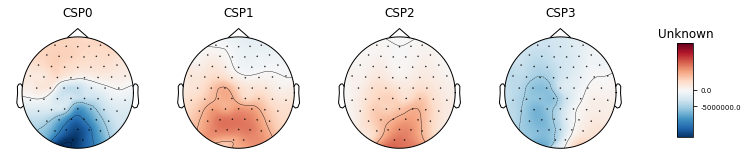

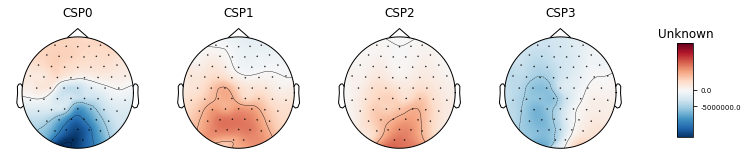

In [126]:
# Printing the results
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1. - class_balance)
print("Classification accuracy: %f / Chance level: %f" % (np.mean(scores), class_balance))
# plot CSP patterns estimated on full data for visualization
csp.fit_transform(data, labels)

layout = read_layout('EEG1005')
csp.plot_patterns(movement_epochs.info, layout=layout, ch_type='eeg', units='Unknown', size=1.5)

In [120]:
scores

array([0.79761905, 0.8452381 , 0.82142857, 0.83333333, 0.8452381 ])

Now lets filter the data for alpha 8-12 Hz and beta 16-24 Hz. By filtering ther data becomes more

In [247]:
psd_multitaper??